Анализ данных
========================

## 1.Загрузка данных

In [1]:
import pandas as pd
import numpy as np s

In [2]:
df = pd.read_csv('./dataset.csv')

In [3]:
df.head()

Unnamed: 0                  path  gender  number  \
0           0  train/000bee1b1d.wav    male  992597   
1           1  train/00a06f910a.wav  female  958380   
2           2  train/00a9347c36.wav    male  914706   
3           3  train/00bd5a31b9.wav    male  177872   
4           4  train/00c3b103f1.wav  female  171852   

                                             text  result  
0  девятьсот девяноста два пятьсот девяноста семь  992597  
1   девятьсот пятьдесят восемь триста восемьдесят  958380  
2            девятьсот четырнадцать семьсот шесть  914706  
3      сто семьдесят семь восемьсот семьдесят два  177872  
4      сто семьдесят один восемьсот пятьдесят два  171852

## 2. Расчет количества уникальных слов

In [4]:
all_words = []
for i in df['text']:
    all_words += i.split()
len(list(set(all_words)))

36

## 3. Расчет количества уникальных букв в наборе слов

In [5]:
df['characters'] = [np.unique(list(i.replace(' ',''))) for i in df['text']]
df['count_unique_characters'] = [len(list(set(i))) for i in df['characters']]
df

Unnamed: 0                  path  gender  number  \
0            0  train/000bee1b1d.wav    male  992597   
1            1  train/00a06f910a.wav  female  958380   
2            2  train/00a9347c36.wav    male  914706   
3            3  train/00bd5a31b9.wav    male  177872   
4            4  train/00c3b103f1.wav  female  171852   
..         ...                   ...     ...     ...   
95          95  train/0ca4309af1.wav    male  785940   
96          96  train/0caf8fd72e.wav  female  508299   
97          97  train/0cb1e4043d.wav  female  628536   
98          98  train/0cb5da4c61.wav  female  595967   
99          99  train/0cb307a9bf.wav  female  317113   

                                                text  result  \
0     девятьсот девяноста два пятьсот девяноста семь  992597   
1      девятьсот пятьдесят восемь триста восемьдесят  958380   
2               девятьсот четырнадцать семьсот шесть  914706   
3         сто семьдесят семь восемьсот семьдесят два  177872   
4         сто семьдесят один восемьсот пятьдесят два  171852   
..                                               ...     ...   
95          семьсот восемьдесят пять девятьсот сорок  785940   
96            пятьсот восемь двести девяноста девять  508299   
97   шестьсот двадцать восемь пятьсот тридцать шесть  628536   
98  пятьсот девяноста пять девятьсот шестьдесят семь  595967   
99                  триста семнадцать сто тринадцать  317113   

                                          characters  count_unique_characters  
0               [а, в, д, е, м, н, о, п, с, т, ь, я]                       12  
1            [а, в, д, е, и, м, о, п, р, с, т, ь, я]                       13  
2   [а, в, д, е, м, н, о, р, с, т, ц, ч, ш, ы, ь, я]                       16  
3                     [а, в, д, е, м, о, с, т, ь, я]                       10  
4            [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13  
..                                               ...                      ...  
95              [в, д, е, к, м, о, п, р, с, т, ь, я]                       12  
96           [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13  
97     [а, в, д, е, и, м, о, п, р, с, т, ц, ш, ь, я]                       15  
98           [а, в, д, е, м, н, о, п, с, т, ш, ь, я]                       13  
99              [а, д, е, и, м, н, о, р, с, т, ц, ь]                       12  

[100 rows x 8 columns]

In [6]:
len(np.unique(np.concatenate((df['characters']))))

20

## 4. Построение графика распределения букв в наборе слов

In [7]:
import matplotlib.pyplot as plt

In [8]:
unique = np.concatenate((df['characters']))
df_characters = pd.DataFrame({
    'characters': unique,
})
df_characters

characters
0             а
1             в
2             д
3             е
4             м
...         ...
1355          р
1356          с
1357          т
1358          ц
1359          ь

[1360 rows x 1 columns]

<AxesSubplot:>

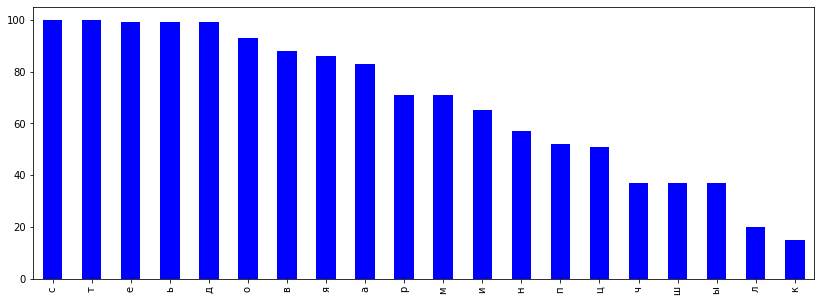

In [9]:
fig = plt.figure(figsize= (14,5))
df_characters['characters'].value_counts().plot.bar(color='b')

## 5. Расчет длины слов

In [10]:
df['len'] = [[len(j) for j in i.split()] for i in df['text']]
df

Unnamed: 0                  path  gender  number  \
0            0  train/000bee1b1d.wav    male  992597   
1            1  train/00a06f910a.wav  female  958380   
2            2  train/00a9347c36.wav    male  914706   
3            3  train/00bd5a31b9.wav    male  177872   
4            4  train/00c3b103f1.wav  female  171852   
..         ...                   ...     ...     ...   
95          95  train/0ca4309af1.wav    male  785940   
96          96  train/0caf8fd72e.wav  female  508299   
97          97  train/0cb1e4043d.wav  female  628536   
98          98  train/0cb5da4c61.wav  female  595967   
99          99  train/0cb307a9bf.wav  female  317113   

                                                text  result  \
0     девятьсот девяноста два пятьсот девяноста семь  992597   
1      девятьсот пятьдесят восемь триста восемьдесят  958380   
2               девятьсот четырнадцать семьсот шесть  914706   
3         сто семьдесят семь восемьсот семьдесят два  177872   
4         сто семьдесят один восемьсот пятьдесят два  171852   
..                                               ...     ...   
95          семьсот восемьдесят пять девятьсот сорок  785940   
96            пятьсот восемь двести девяноста девять  508299   
97   шестьсот двадцать восемь пятьсот тридцать шесть  628536   
98  пятьсот девяноста пять девятьсот шестьдесят семь  595967   
99                  триста семнадцать сто тринадцать  317113   

                                          characters  count_unique_characters  \
0               [а, в, д, е, м, н, о, п, с, т, ь, я]                       12   
1            [а, в, д, е, и, м, о, п, р, с, т, ь, я]                       13   
2   [а, в, д, е, м, н, о, р, с, т, ц, ч, ш, ы, ь, я]                       16   
3                     [а, в, д, е, м, о, с, т, ь, я]                       10   
4            [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13   
..                                               ...                      ...   
95              [в, д, е, к, м, о, п, р, с, т, ь, я]                       12   
96           [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13   
97     [а, в, д, е, и, м, о, п, р, с, т, ц, ш, ь, я]                       15   
98           [а, в, д, е, м, н, о, п, с, т, ш, ь, я]                       13   
99              [а, д, е, и, м, н, о, р, с, т, ц, ь]                       12   

                    len  
0    [9, 9, 3, 7, 9, 4]  
1      [9, 9, 6, 6, 11]  
2         [9, 12, 7, 5]  
3    [3, 9, 4, 9, 9, 3]  
4    [3, 9, 4, 9, 9, 3]  
..                  ...  
95     [7, 11, 4, 9, 5]  
96      [7, 6, 6, 9, 6]  
97   [8, 8, 6, 7, 8, 5]  
98  [7, 9, 4, 9, 10, 4]  
99       [6, 10, 3, 10]  

[100 rows x 9 columns]

## 6. Построение распределения длины слов

In [11]:
lens = np.concatenate((df['len']))
df_lens = pd.DataFrame({
    'lens': lens
})
df_lens

lens
0       9
1       9
2       3
3       7
4       9
..    ...
523     4
524     6
525    10
526     3
527    10

[528 rows x 1 columns]

In [12]:
fig = plt.figure(figsize= (14,5))
df_lens['lens'].value_counts().plot.bar(color='b')

<AxesSubplot:>

## 7. Расчет начала слова и номера буквы в наборе слова

In [13]:
df['first_character'] = [[j[0] for j in i.split()] for i in df['text']]
df['first_character_number'] = [[list(unique).index(j[0]) for j in i.split()] for i in df['text']]
df

Unnamed: 0                  path  gender  number  \
0            0  train/000bee1b1d.wav    male  992597   
1            1  train/00a06f910a.wav  female  958380   
2            2  train/00a9347c36.wav    male  914706   
3            3  train/00bd5a31b9.wav    male  177872   
4            4  train/00c3b103f1.wav  female  171852   
..         ...                   ...     ...     ...   
95          95  train/0ca4309af1.wav    male  785940   
96          96  train/0caf8fd72e.wav  female  508299   
97          97  train/0cb1e4043d.wav  female  628536   
98          98  train/0cb5da4c61.wav  female  595967   
99          99  train/0cb307a9bf.wav  female  317113   

                                                text  result  \
0     девятьсот девяноста два пятьсот девяноста семь  992597   
1      девятьсот пятьдесят восемь триста восемьдесят  958380   
2               девятьсот четырнадцать семьсот шесть  914706   
3         сто семьдесят семь восемьсот семьдесят два  177872   
4         сто семьдесят один восемьсот пятьдесят два  171852   
..                                               ...     ...   
95          семьсот восемьдесят пять девятьсот сорок  785940   
96            пятьсот восемь двести девяноста девять  508299   
97   шестьсот двадцать восемь пятьсот тридцать шесть  628536   
98  пятьсот девяноста пять девятьсот шестьдесят семь  595967   
99                  триста семнадцать сто тринадцать  317113   

                                          characters  count_unique_characters  \
0               [а, в, д, е, м, н, о, п, с, т, ь, я]                       12   
1            [а, в, д, е, и, м, о, п, р, с, т, ь, я]                       13   
2   [а, в, д, е, м, н, о, р, с, т, ц, ч, ш, ы, ь, я]                       16   
3                     [а, в, д, е, м, о, с, т, ь, я]                       10   
4            [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13   
..                                               ...                      ...   
95              [в, д, е, к, м, о, п, р, с, т, ь, я]                       12   
96           [а, в, д, е, и, м, н, о, п, с, т, ь, я]                       13   
97     [а, в, д, е, и, м, о, п, р, с, т, ц, ш, ь, я]                       15   
98           [а, в, д, е, м, н, о, п, с, т, ш, ь, я]                       13   
99              [а, д, е, и, м, н, о, р, с, т, ц, ь]                       12   

                    len     first_character first_character_number  
0    [9, 9, 3, 7, 9, 4]  [д, д, д, п, д, с]     [2, 2, 2, 7, 2, 8]  
1      [9, 9, 6, 6, 11]     [д, п, в, т, в]        [2, 7, 1, 9, 1]  
2         [9, 12, 7, 5]        [д, ч, с, ш]         [2, 36, 8, 37]  
3    [3, 9, 4, 9, 9, 3]  [с, с, с, в, с, д]     [8, 8, 8, 1, 8, 2]  
4    [3, 9, 4, 9, 9, 3]  [с, с, о, в, п, д]     [8, 8, 6, 1, 7, 2]  
..                  ...                 ...                    ...  
95     [7, 11, 4, 9, 5]     [с, в, п, д, с]        [8, 1, 7, 2, 8]  
96      [7, 6, 6, 9, 6]     [п, в, д, д, д]        [7, 1, 2, 2, 2]  
97   [8, 8, 6, 7, 8, 5]  [ш, д, в, п, т, ш]   [37, 2, 1, 7, 9, 37]  
98  [7, 9, 4, 9, 10, 4]  [п, д, п, д, ш, с]    [7, 2, 7, 2, 37, 8]  
99       [6, 10, 3, 10]        [т, с, с, т]           [9, 8, 8, 9]  

[100 rows x 11 columns]

## 8. Построение распределения начала слова в наборе слова

In [14]:
first_character = np.concatenate((df['first_character']))
df_first_character = pd.DataFrame({
    'first_character': first_character
})
df_first_character

first_character
0                 д
1                 д
2                 д
3                 п
4                 д
..              ...
523               с
524               т
525               с
526               с
527               т

[528 rows x 1 columns]

<AxesSubplot:>

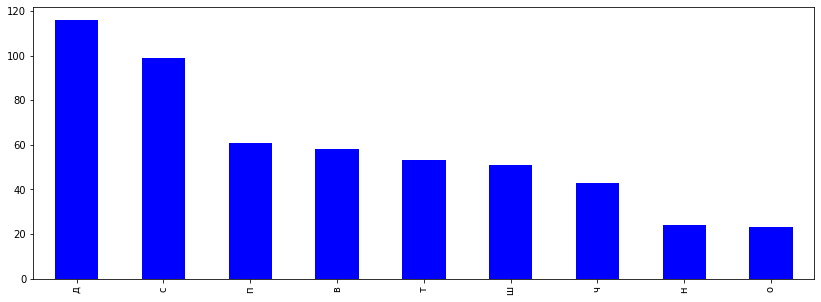

In [15]:
fig = plt.figure(figsize= (14,5))
df_first_character['first_character'].value_counts().plot.bar(color='b')